### Segmenting and Clustering Neighbourhoods in Toronto

The project includes scraping the Wikipedia page for the postal codes of Canada and then process and clean the data for the clustering. The clustering is carried out by K Means and the clusters are plotted using the Folium Library. The Boroughs containing the name 'Toronto' in it are first plotted and then clustered and plotted again.

### All the 3 tasks of web scraping, cleaning and clustering are implemented in the same notebook for the ease of evaluation.

### Installing and Importing the required Libraries

In [5]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

### Scraping the Wikipedia page for the table of postal codes of Canada

BeautifulSoup Library of Python is used for web scraping of table from the Wikipedia. The title of the webpage is printed to check if the page has been scraped successfully or not. Then the table of postal codes of Canada is printed.

In [6]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park / Ontario Provincial Government,M8ANot assigned,M9AEtobicoke(Islington Avenue)
M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale)
M1CScarborough(Rouge Hill / Port Union / Highland Creek),M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood)
M1EScarborough(Guildwood / Morningside / West Hill),M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights / Downsview North),M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union Station / Toronto Islands),M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
M1KScarborough(Kennedy Park / Ionview / East Birchmount Park),M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / Design Exchange),M6KWest Toronto(Brockton / Parkdale Village / Exhibition Place),M7KNot assigned,M8KNot assigned,M9KNot assigned
M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria Hotel),M6LNorth York(North Park / Maple Leaf Park / Upwood Park),M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
M1MScarborough(Cliffside / Cliffcrest / Scarborough Village West),M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and Silverthorn),M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)
M1NScarborough(Birch Cliff / Cliffside West),M2NNorth York(Willowdale)South,M3NNorth York(Downsview)Northwest,M4NCentral Toronto(Lawrence Park),M5NCentral Toronto(Roselawn),M6NYork(Runnymede / The Junction North),M7NNot assigned,M8NNot assigned,M9NYork(Weston)


### The html table is converted to Pandas DataFrame for cleaning and preprocessing.

In [7]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park / Ontario Provincial Government,M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


### Data preprocessing and cleaning

In [ ]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.df[0] != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])

df2

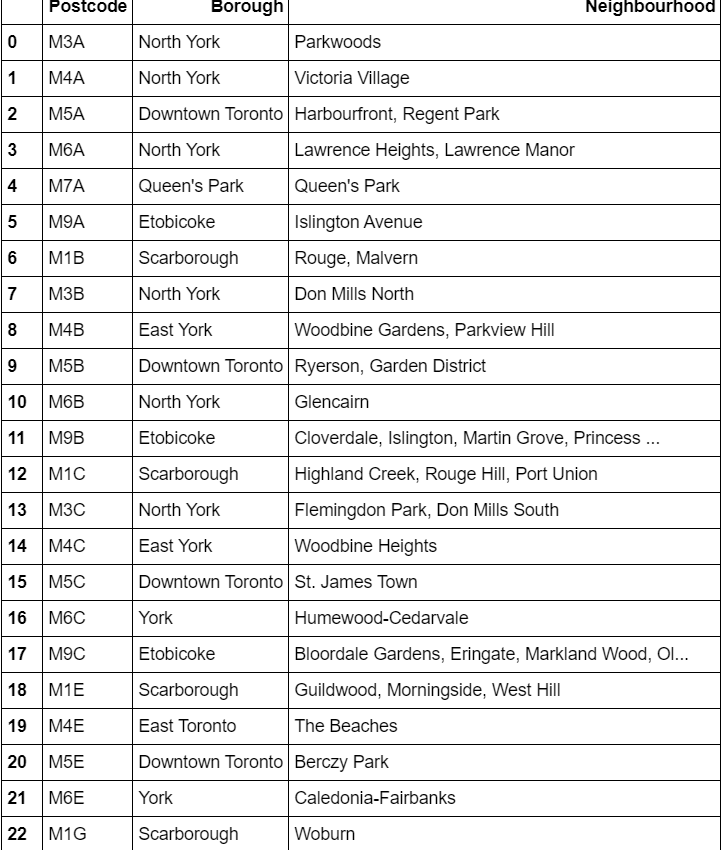

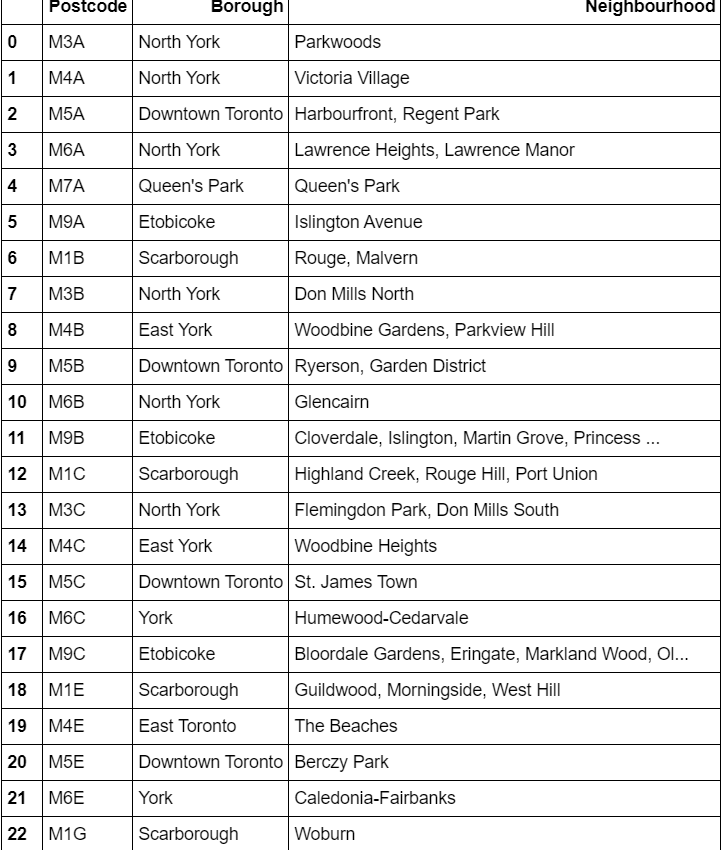

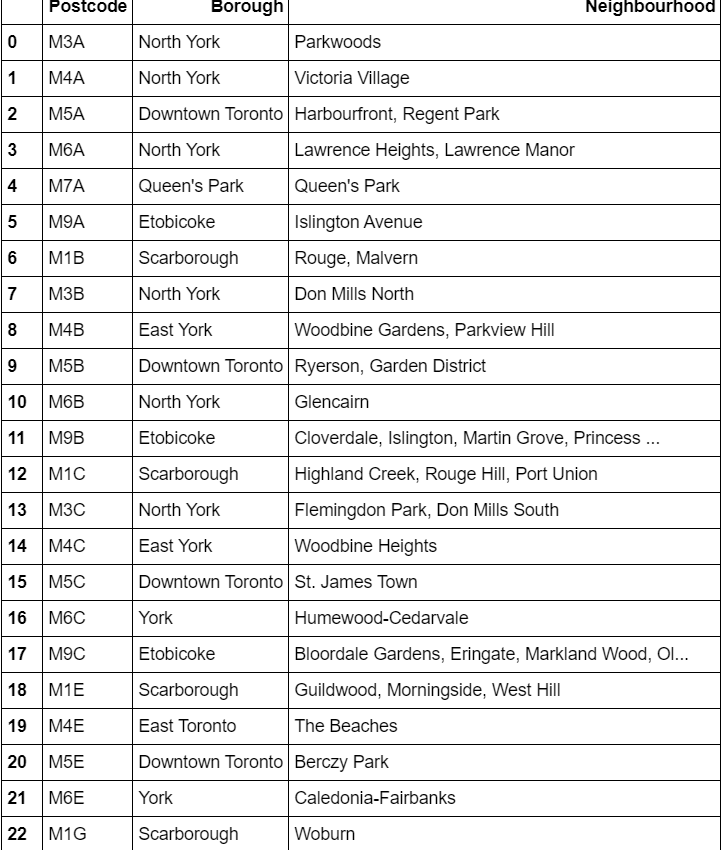

In [ ]:
# Shape of data frame
df2.shape

(103, 3)

### Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada

In [11]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada

In [ ]:
lat_lon.rename(columns={'Postal Code':'Postcode'},inplace=True)
df3 = pd.merge(df2,lat_lon,on='Postcode')
df3.head()

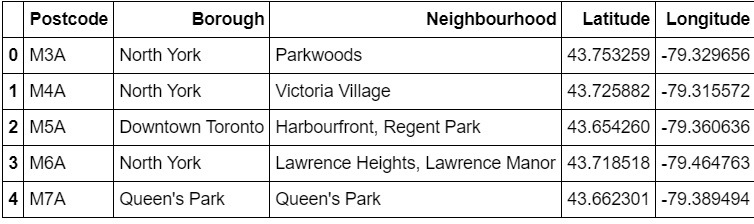

## The notebook from here includes the Clustering and the plotting of the neighbourhoods of Canada which contain Toronto in their Borough

### Getting all the rows from the data frame which contains Toronto in their Borough.

In [ ]:
df4 = df3[df3['Borough'].str.contains('Toronto',regex=False)]
df4

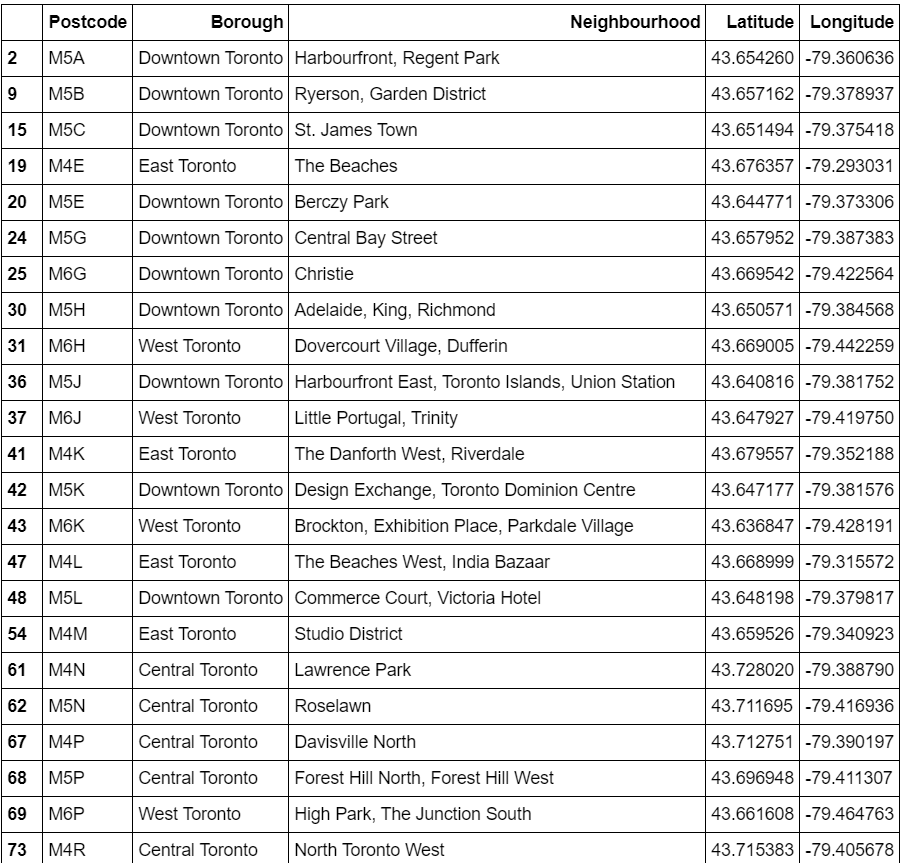

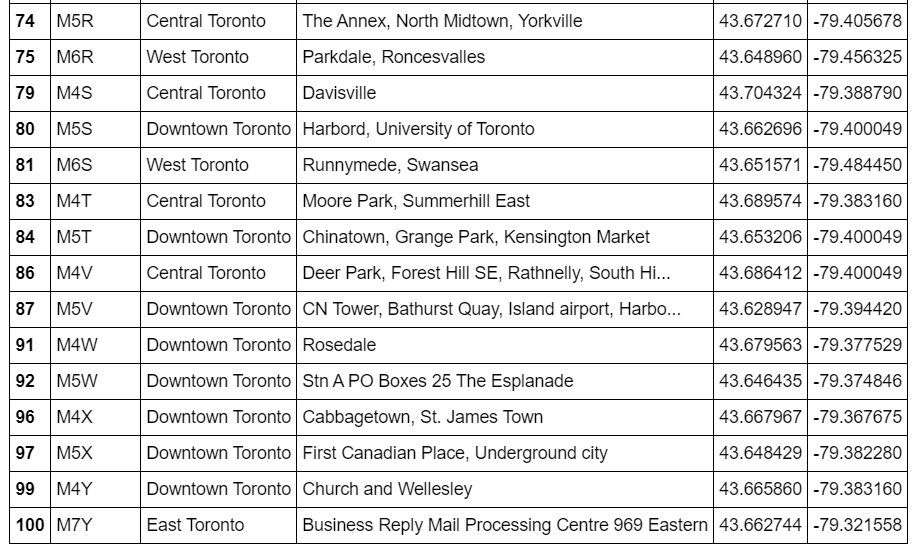

### Visualizing all the Neighbourhoods of the above data frame using Folium

In [ ]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df4['Latitude'],df4['Longitude'],df4['Borough'],df4['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

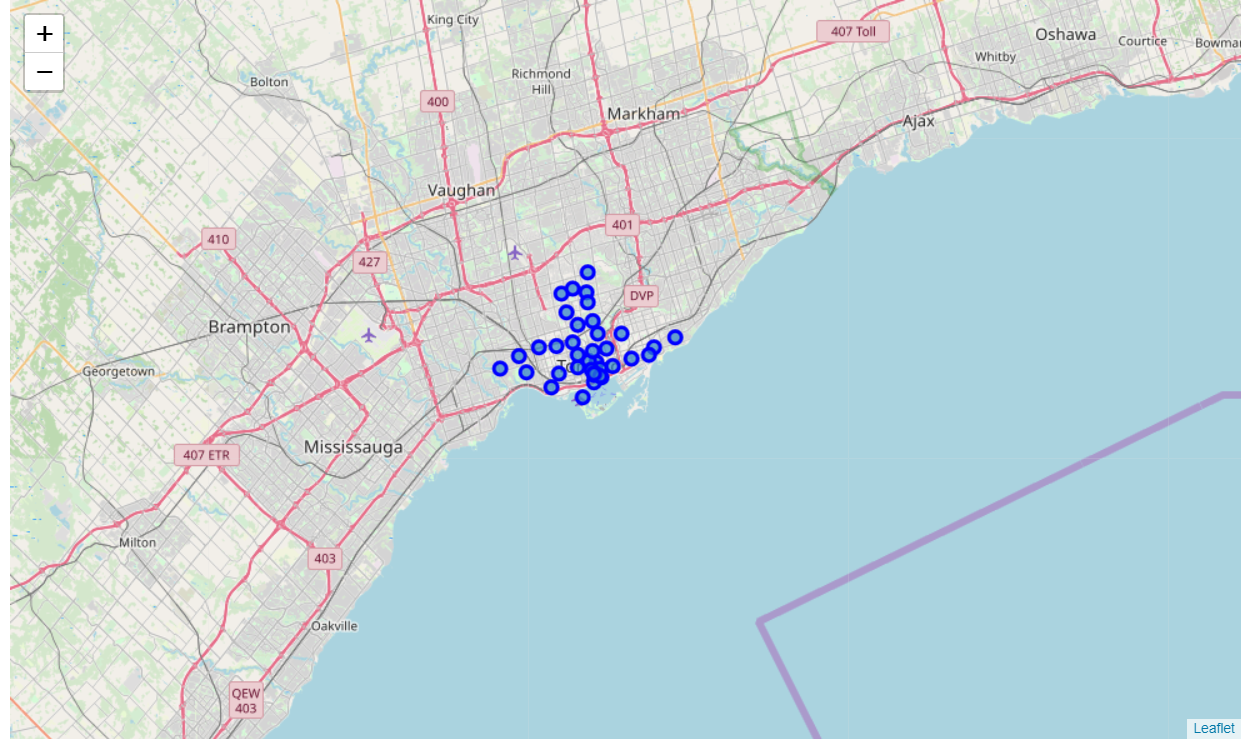

### The map might not be visible on Github. Check out the README for the map.

### Using KMeans clustering for the clsutering of the neighbourhoods

In [ ]:
k=5
toronto_clustering = df4.drop(['Postcode','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
df4.insert(0, 'Cluster Labels', kmeans.labels_)

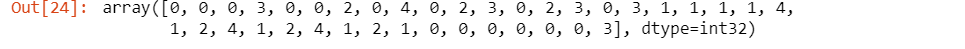

In [ ]:
df4

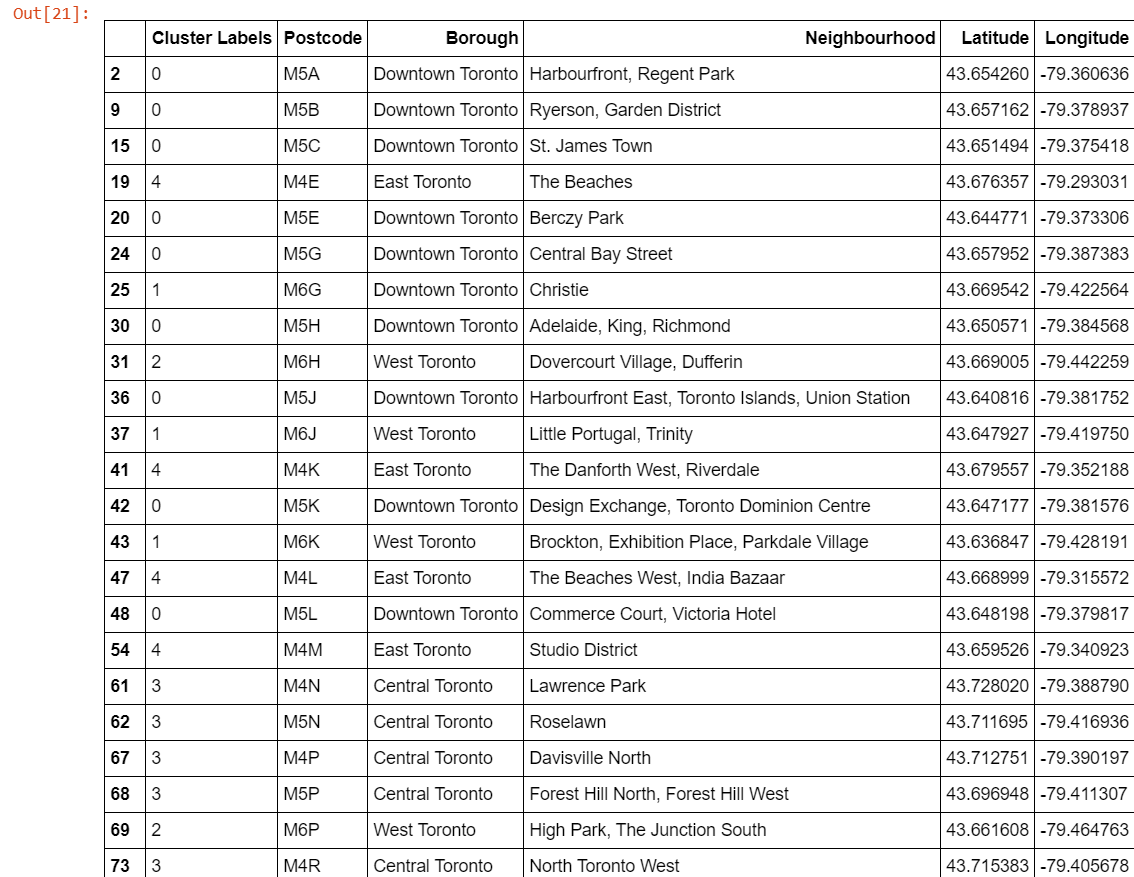

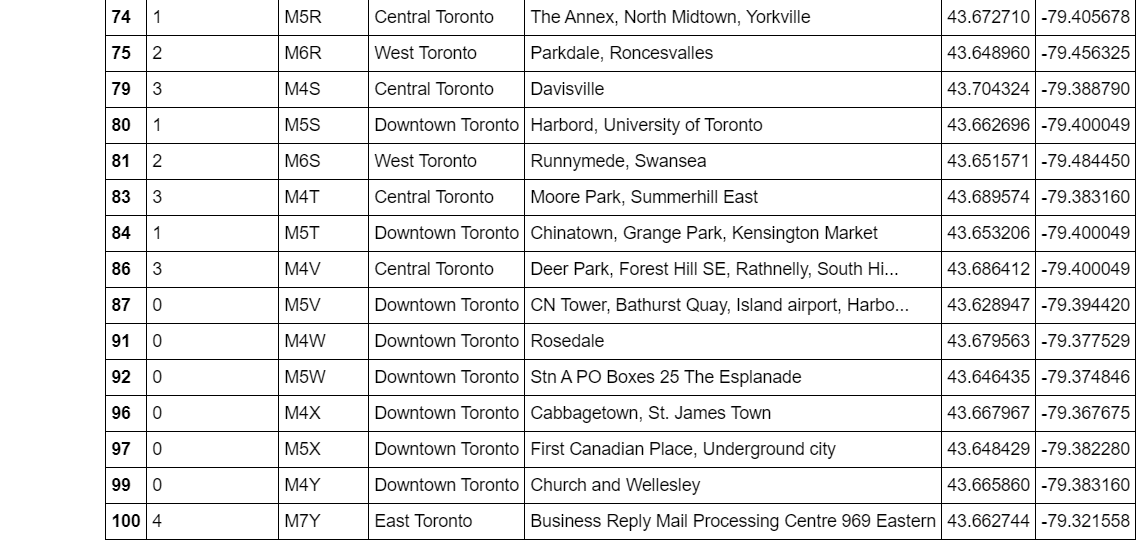

In [ ]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df4['Latitude'], df4['Longitude'], df4['Neighbourhood'], df4['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

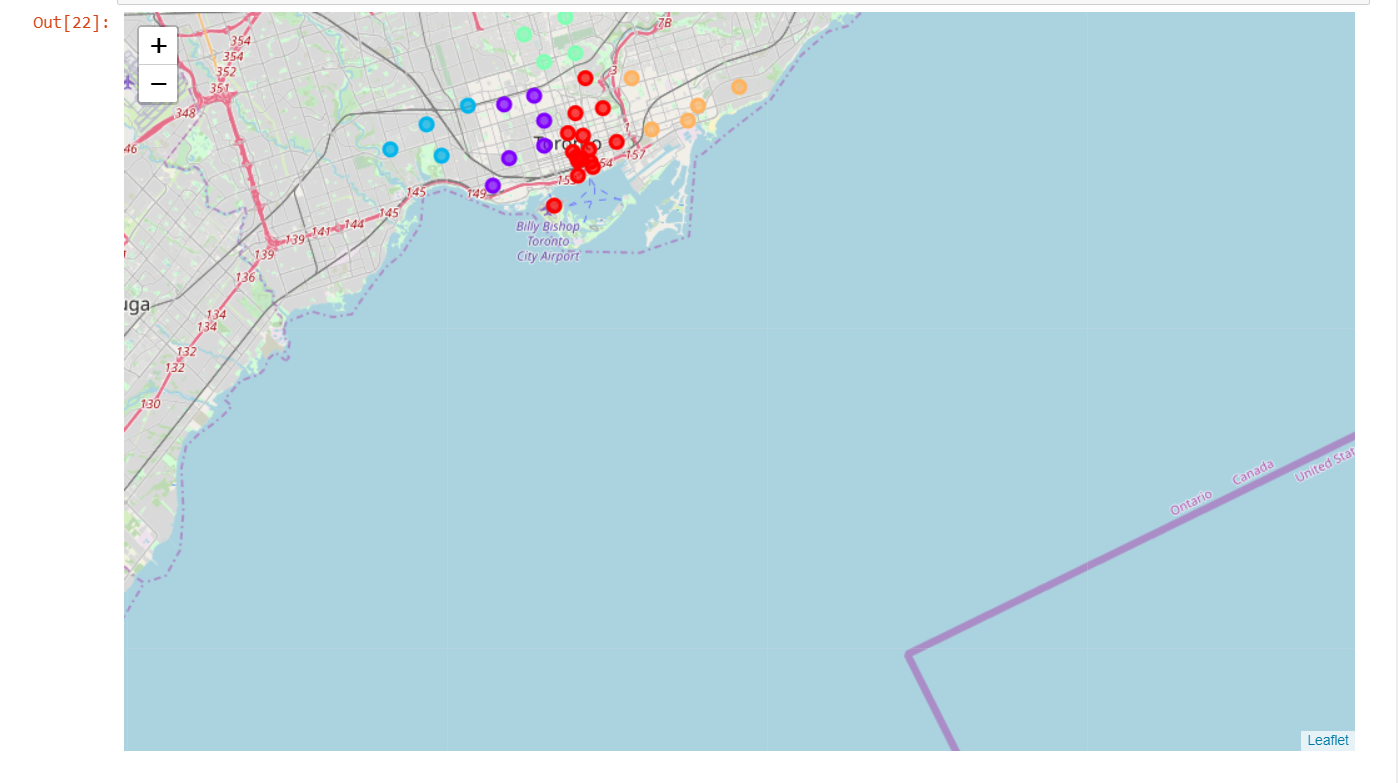

### The map might not be visible on Github. Check out the README for the map.